In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

# Setting up the Data

In [111]:
data = pd.read_csv("credit-card-fraud/card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [112]:
y = data['fraud']

X = data.drop('fraud', axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Method

In [114]:
dec_model = DecisionTreeClassifier(random_state=42)

dec_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
dec_y_pred = dec_model.predict(X_test)

dec_f1 = f1_score(y_test, dec_y_pred)

dec_acc = accuracy_score(y_test, dec_y_pred)

print(f'F1 Score: {dec_f1}')
print(f'Accuracy: {dec_acc}')

F1 Score: 0.9999425914231587
Accuracy: 0.99999


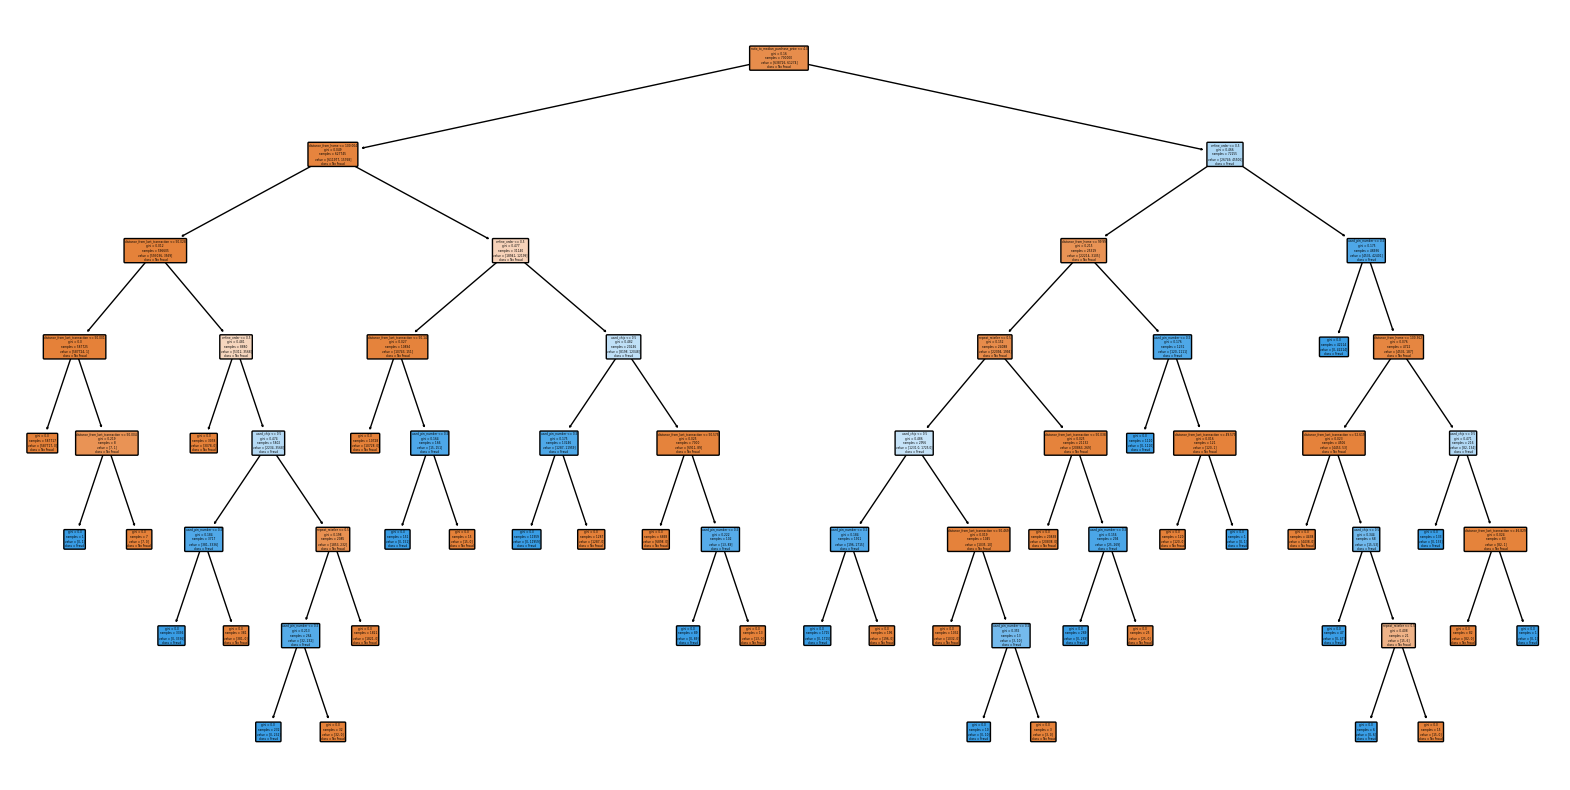

In [116]:
from sklearn.tree import plot_tree


# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dec_model, filled=True, feature_names=X.columns, class_names=['No Fraud', 'Fraud'], rounded=True, proportion=False)
plt.show()


# Random Forest Method

In [117]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
rf_y_pred = rf_model.predict(X_test)

rf_f1 = f1_score(y_test, rf_y_pred)

rf_acc = accuracy_score(y_test, rf_y_pred)

print(f'F1 Score: {rf_f1}')
print(f'Accuracy: {rf_acc}')

F1 Score: 0.9999617268830373
Accuracy: 0.9999933333333333


# Neural Network Method

In [119]:
nn_model = MLPClassifier(random_state=42, max_iter=1000)

nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [120]:
nn_y_pred = nn_model.predict(X_test)

nn_f1 = f1_score(y_test, nn_y_pred)

nn_acc = accuracy_score(y_test, nn_y_pred)

print(f'F1 Score: {nn_f1}')
print(f'Accuracy: {nn_acc}')

F1 Score: 0.9872421695951108
Accuracy: 0.9977733333333333


# New dataset

# Load Data

In [293]:
data1 = pd.read_csv("credit-card-fraud-detection/creditcard.csv")
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [276]:
y1 = data1['Class']

X1 = data1.drop('Class', axis=1)

class_counts = data1['Class'].value_counts()
counts = data1['Class'].count()

class_zero = (class_counts[0] / counts) * 100
class_one = (class_counts[1] / counts) * 100

print(f"Fraud {fraud}")
print(f"Percentage of fraud: {class_one}")

Fraud Class
0    284315
1       492
Name: count, dtype: int64
Percentage of fraud: 0.1727485630620034


In [301]:
print(data1['Amount'].max())
print(data1['Amount'].min())

25691.16
0.0


In [292]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

# Decision Tree Method

In [ ]:
dec_model1 = DecisionTreeClassifier()

dec_model1.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=42)

In [140]:
dec_y_pred1 = dec_model1.predict(X_test1)

dec_f11 = f1_score(y_test1, dec_y_pred1)

dec_acc1 = accuracy_score(y_test1, dec_y_pred1)

print(f'F1 Score: {dec_f11}')
print(f'Accuracy: {dec_acc1}')

F1 Score: 0.723404255319149
Accuracy: 0.9990871107053826


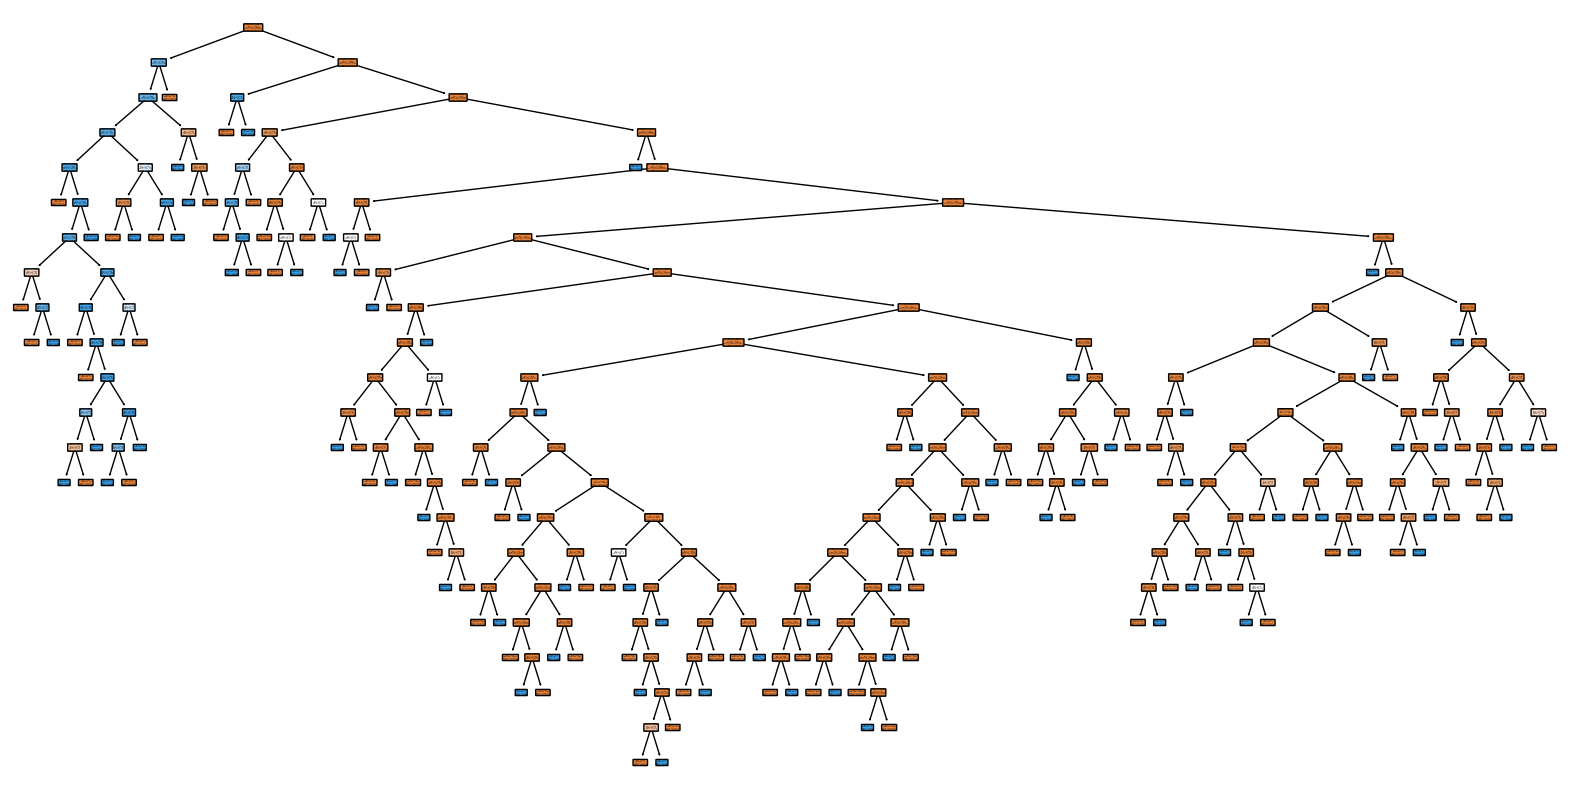

In [141]:
plt.figure(figsize=(20,10))
plot_tree(dec_model1, filled=True, feature_names=X1.columns, class_names=['No Fraud', 'Fraud'], rounded=True, proportion=False)
plt.show()

# Random Forest Method

In [142]:
rf_model1 = RandomForestClassifier(random_state=42)

rf_model1.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred1 = rf_model1.predict(X_test1)

rf_f11 = f1_score(y_test1, rf_y_pred1)

rf_acc1 = accuracy_score(y_test1, rf_y_pred1)

print(f'F1 Score: {rf_f11}')
print(f'Accuracy: {rf_acc1}')

F1 Score: 0.8685258964143426
Accuracy: 0.9996137776061234


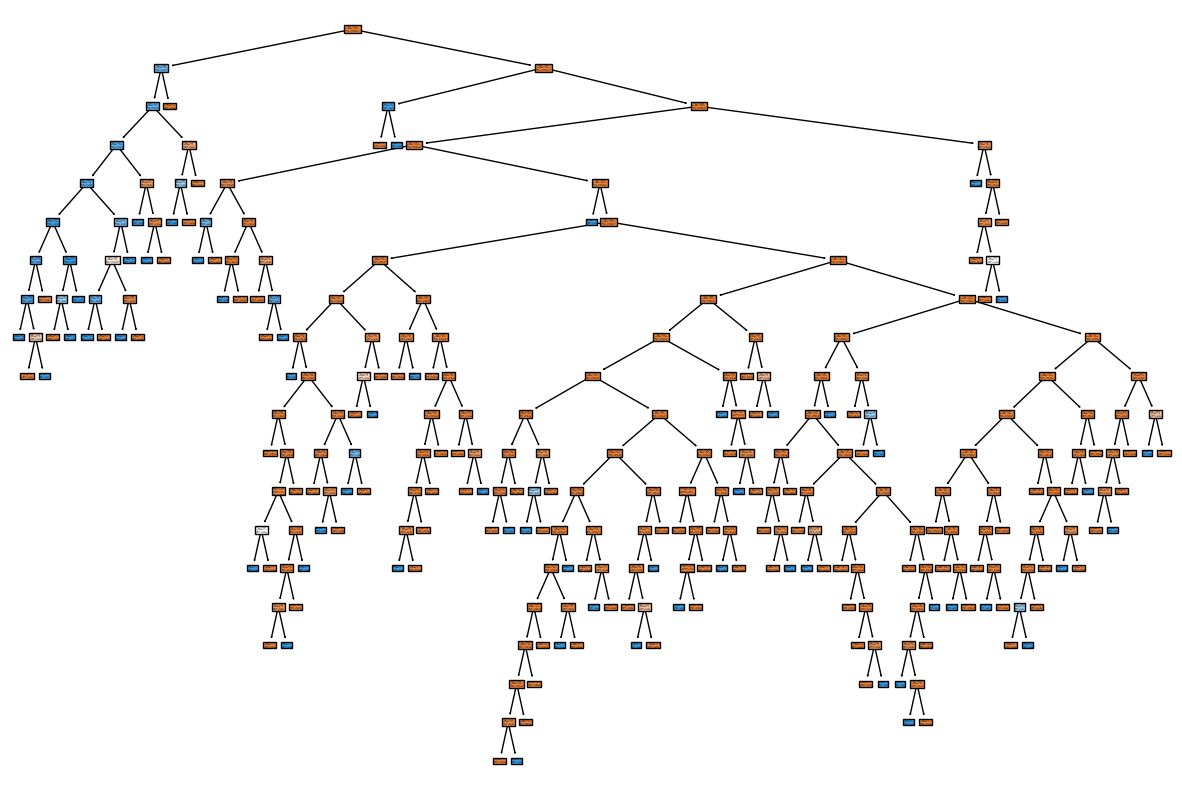

In [146]:
plt.figure(figsize=(15, 10))
plot_tree(rf_model1.estimators_[0], filled=True, feature_names=X1.columns, class_names=['No Fraud', 'Fraud'])
plt.show()

# Neural Network Method

In [ ]:
nn_model1 = MLPClassifier(random_state=42, max_iter=1000)

nn_model1.fit(X_train1, y_train1)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
nn_y_pred1 = nn_model1.predict(X_test1)

nn_f11 = f1_score(y_test1, nn_y_pred1)

nn_acc1 = accuracy_score(y_test1, nn_y_pred1)

print(f'F1 Score: {nn_f11}')
print(f'Accuracy: {nn_acc1}')

F1 Score: 0.5904255319148937
Accuracy: 0.9981976288285758


# Logistic Regression

In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train1)

# Predict on the test set
y_pred1 = model.predict(X_test_scaled)

# Calculate F1 score, Precision, and Recall
f1 = f1_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)


In [137]:
# Print the results
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7264957264957265
Precision: 0.8673469387755102
Recall: 0.625


# Keras

In [235]:
data_np = X1.to_numpy()
data_shape = len(data_np[0])
print(f"data shape: {data_shape}")
model = Sequential([
    Input(shape=(data_shape,)),
    Dense(128, activation='relu'),
    Dropout(0.8),
    Dense(64, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='softmax')
])

adam = Adam(learning_rate=0.001)

model.compile(optimizer=adam, loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

data shape: 30


In [236]:
train_model = model.fit(X_train1, y_train1, epochs=200, batch_size=32, validation_data=(X_test1, y_test1), callbacks=[early_stopping])

Epoch 1/200


c:\Users\inder\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


6202/6231 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 243.5462

c:\Users\inder\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 866us/step - loss: 242.6795 - val_loss: 0.0529
Epoch 2/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - loss: 0.9218 - val_loss: 0.0149
Epoch 3/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 805us/step - loss: 0.1279 - val_loss: 0.0121
Epoch 4/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - loss: 0.0220 - val_loss: 0.0119
Epoch 5/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 806us/step - loss: 0.1236 - val_loss: 0.0118
Epoch 6/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 840us/step - loss: 0.0326 - val_loss: 0.0118
Epoch 7/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step - loss: 0.0366 - val_loss: 0.0118
Epoch 8/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 882us/step - loss: 0.0537 - val_loss: 0.0118
Epoch 9/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step - loss: 0.0183 - val_loss: 0.0118
Epoch 10/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 845us/step - loss: 0.0303 - val_loss: 0.0119
Epoch 11/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 749us/step - loss: 0.0610 - val_loss: 0.0120
Epoch 1

In [226]:
# Predictions
predictions = model.predict(X_test1)
predicted_classes = np.argmax(predictions, axis=1)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 571us/step


In [227]:
# F1 Score
f1_score_value = f1_score(y_test1, predicted_classes, average='weighted')
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.9976130772685202


# Train test split with stratify test

In [183]:
print(X1.shape)
print(y1.shape)

(284807, 30)
(284807,)


In [280]:
X_train1_stratify, X_test1_stratify, y_train1_stratify, y_test1_stratify = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify=y1)

# Keras with stratify

In [253]:
data_np = X1.to_numpy()
data_shape = len(data_np[0])
print(f"data shape: {data_shape}")
model_stratify = Sequential([
    Input(shape=(data_shape,)),
    Dense(128, activation='relu', kernel_regularizer=L2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=L2(0.01)),
    Dropout(0.5),
    # Dense(15, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])

adam = Adam(learning_rate=0.001)

model_stratify.compile(optimizer=adam, loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

data shape: 30


In [254]:
train_model_stratify = model_stratify.fit(X_train1_stratify, y_train1_stratify, epochs=200, batch_size=32, validation_data=(X_test1_stratify, y_test1_stratify), callbacks=[early_stopping])

Epoch 1/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 724us/step - loss: 44.0584 - val_loss: 0.4030
Epoch 2/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 663us/step - loss: 0.4019 - val_loss: 0.4156
Epoch 3/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 673us/step - loss: 0.2254 - val_loss: 0.0486
Epoch 4/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 660us/step - loss: 0.0789 - val_loss: 0.0261
Epoch 5/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 638us/step - loss: 0.0401 - val_loss: 0.0197
Epoch 6/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 646us/step - loss: 0.0302 - val_loss: 0.0166
Epoch 7/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 670us/step - loss: 0.0242 - val_loss: 0.0148
Epoch 8/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 643us/step - loss: 0.0175 - val_loss: 0.0133
Epoch 9/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 631us/step - loss: 0.0125 - val_loss: 0.0128
Epoch 10/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 662us/step - loss: 0.0127 - val_loss: 0.0127
Epoch 11/200
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 4s 671us/step - loss: 0.0119 - val_loss: 0.0

In [255]:
# Predictions
predictions_stratify = model_stratify.predict(X_test1_stratify)
predicted_classes_stratify = np.argmax(predictions_stratify, axis=1)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step


In [256]:
# F1 Score
f1_score_value_stratify = f1_score(y_test1_stratify, predicted_classes_stratify, average='weighted')
print(f'F1 Score: {f1_score_value_stratify}')

F1 Score: 0.9974025273581728


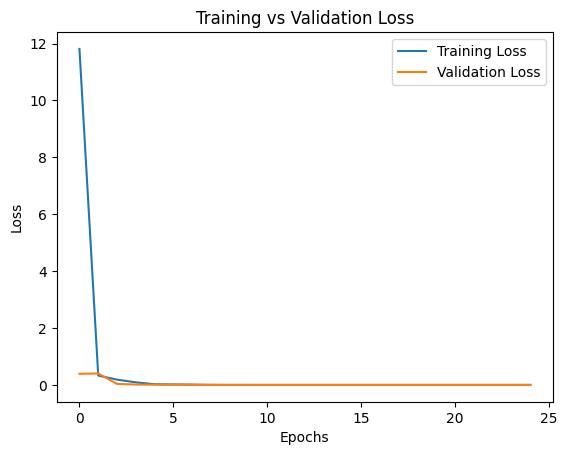

In [257]:
# Plot the loss
plt.plot(train_model_stratify.history['loss'], label='Training Loss')
plt.plot(train_model_stratify.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [279]:
# predictions_stratify = model_stratify.predict(X_test1_stratify)
# predicted_classes_stratify = np.argmax(predictions_stratify, axis=1)

# f1_score_value_stratify = f1_score(y_test1_stratify, predicted_classes_stratify, average='weighted')
# print(f'F1 Score: {f1_score_value_stratify}')
# fbeta = fbeta_score(y_test1_stratify,predicted_classes_stratify, average='weighted', beta=2.0) 
# print("F(beta=2.0)-score:", fbeta)

# print("Precision:", precision_score(y_test1_stratify, predicted_classes_stratify))
# print("Recall:", recall_score(y_test1_stratify, predicted_classes_stratify))

In [288]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1_stratify)
X_test_scaled = scaler.transform(X_test1_stratify)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train1_stratify)

# Predict on the test set
y_pred1 = model.predict(X_test_scaled)

# Calculate F1 score, Precision, and Recall
f1 = f1_score(y_test1_stratify, y_pred1)
f2 = fbeta_score(y_test1_stratify, y_pred1, beta=2)
precision = precision_score(y_test1_stratify, y_pred1)
recall = recall_score(y_test1_stratify, y_pred1)

In [289]:
# Print the results
print("F1 Score:", f1)
print("F2 Score:", f2)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7294117647058823
F2 Score: 0.6652360515021459
Precision: 0.8691588785046729
Recall: 0.6283783783783784


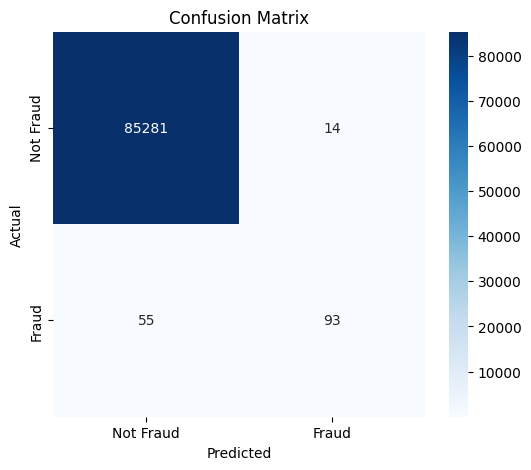

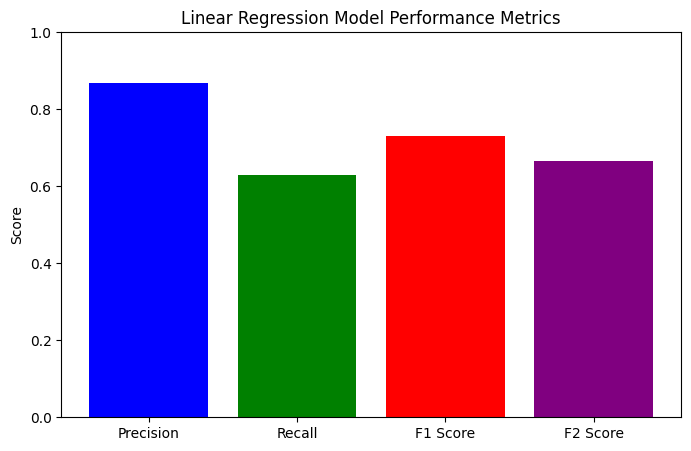

In [291]:
# Confusion Matrix
cm = confusion_matrix(y_test1_stratify, y_pred1)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize precision, recall, F1, F2 scores in a bar chart
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Linear Regression Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()